In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# regression : 중산층 소비자 데이터 활용

In [5]:
df = pd.read_csv('e:/Git_private_dodo_Riley/laptop_desktop/Code_SJH/통계학머신러닝_양진욱/data/middle.csv')
df

,food,book,cul,cloth,travel,status
0,0.263017,0.759435,0.472159,0.365709,0.331119,1
1,0.192398,0.514150,0.222987,0.388257,0.307846,1
2,0.513997,0.448345,0.554666,0.394886,0.363455,0
3,0.387733,0.582956,0.425999,0.349615,0.197456,1
4,0.421674,0.560781,0.430536,0.734413,0.352037,0
...,...,...,...,...,...,...
95,0.170611,0.656753,0.478071,0.319717,0.312484,1
96,0.393424,0.927768,0.239522,0.489993,0.304990,1
97,0.348236,0.758736,0.304017,0.252886,0.245836,1
98,0.378175,0.606787,0.182603,0.473498,0.297998,0


In [9]:
scaler = StandardScaler()
middle_regu = scaler.fit(df).transform(df)
middle_regu.shape 

(100, 6)

In [10]:
middle_regu = pd.DataFrame(middle_regu)
middle_regu.columns = df.columns
middle_regu

,food,book,cul,cloth,travel,status
0,-0.679491,0.285453,0.769363,-0.392849,1.161096,0.670280
1,-1.366491,-0.793116,-1.704388,-0.177986,0.731897,0.670280
2,1.762079,-1.082473,1.588480,-0.114819,1.757418,-1.491914
3,0.533770,-0.490561,0.311090,-0.546207,-1.303885,0.670280
4,0.863950,-0.588070,0.356134,3.120538,1.546859,-1.491914
...,...,...,...,...,...,...
95,-1.578440,-0.166059,0.828053,-0.831106,0.817433,0.670280
96,0.589127,1.025649,-1.540227,0.791461,0.679229,0.670280
97,0.149533,0.282381,-0.899934,-1.467939,-0.411665,0.670280
98,0.440784,-0.385771,-2.105312,0.634279,0.550286,-1.491914


In [11]:
X = middle_regu.iloc[:,:-1].values
y = middle_regu.iloc[:,-1].values

model = svm.SVR()
model.fit(X,y)

SVR()

In [12]:
model.score(X,y)

0.6082849462996812

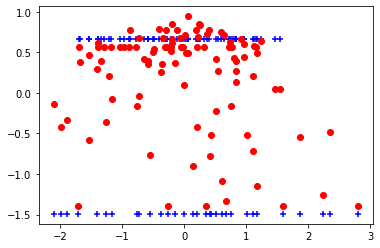

In [13]:
plt.scatter(X[:,2],y,marker='+', c='blue')
plt.scatter(X[:,2],model.predict(X),marker='o', c='red')
plt.show()

In [15]:
pred_list = list(model.predict(X)>0)
origin_list = list(df.status==1)

sum(origin_list[i]==pred_list[i] for i in range(len(pred_list)))/len(pred_list)

0.95

# classification : 숫자분류

In [16]:
import matplotlib.pyplot as plt
import random
from sklearn import datasets, tree , svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 데이터를 읽어오기
digits = datasets.load_digits()

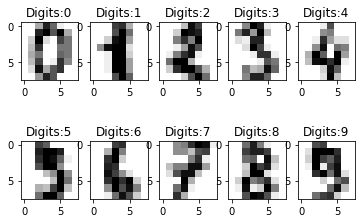

In [19]:
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2,5,label+1)
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digits:{0}'.format(label))
plt.show()

In [24]:
images = digits.images
labels = digits.target


images = images.reshape(images.shape[0],-1) # 차원 축소

In [28]:
n_samples = len(images)
train_size = int(n_samples*2/3)

classifier = svm.SVC(C=1.0, gamma=0.001)
classifier.fit(images[:train_size],labels[:train_size])

SVC(gamma=0.001)

In [29]:
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

In [32]:
from sklearn.metrics import classification_report

print(confusion_matrix(expected,predicted))
print(classification_report(expected,predicted))

[[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1  0  0  0  0  0  0]
 [ 0  0  0 50  0  2  0  3  7  0]
 [ 0  0  0  0 59  0  0  0  0  3]
 [ 0  0  0  0  0 58  1  0  0  0]
 [ 0  1  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 61  0  0]
 [ 0  1  0  0  0  0  0  0 54  0]
 [ 0  0  0  1  0  1  0  0  0 56]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        60
           3       0.96      0.81      0.88        62
           4       0.98      0.95      0.97        62
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        61
           7       0.95      1.00      0.98        61
           8       0.89      0.98      0.93        55
           9       0.95      0.97      0.96        58

    accuracy                           0.96       599
   macro avg       

In [33]:
from sklearn import datasets 
from sklearn import svm
from sklearn import metrics

import numpy as np
import pandas as pd

# 유방암 환자 데이터 로딩

cancer = datasets.load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [34]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [35]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [36]:
cancer.data.shape

(569, 30)

In [37]:
cancer.target, cancer.target.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [42]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 59   4]
 [  2 106]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

